# Exploratory Data Analysis

## Preparation

### Import Library

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


### Path for Data

In [5]:
data_path = "../data_after_prep"

### Get data from path

In [7]:
list_data = os.listdir(data_path)
list_data

['ADRO2001-2407.csv',
 'AMMN2001-2407.csv',
 'AMRT2001-2407.csv',
 'ASII2001-2407.csv',
 'BBCA2001-2407.csv',
 'GOTO2001-2407.csv',
 'KLBF2001-2407.csv',
 'MAPI2001-2407.csv',
 'TLKM2001-2407.csv']

### Insert all Data to Data Frame

In [16]:
df_adro = pd.read_csv(data_path+"/"+list_data[0])
df_ammn = pd.read_csv(data_path+"/"+list_data[1])
df_amrt = pd.read_csv(data_path+"/"+list_data[2])
df_asii = pd.read_csv(data_path+"/"+list_data[3]) 
df_bbca = pd.read_csv(data_path+"/"+list_data[4])
df_goto = pd.read_csv(data_path+"/"+list_data[5])
df_klbf = pd.read_csv(data_path+"/"+list_data[6])
df_mapi = pd.read_csv(data_path+"/"+list_data[7])
df_tlkm = pd.read_csv(data_path+"/"+list_data[8])

### Method

In [46]:
#stock name list
tech_list = ['ADRO', 'AMMN', 'AMRT', 'ASII', 'BBCA', 'GOTO', 'KLBF', 'MAPI', 'TLKM']
#method to clean data after get from path
def data_clean(df):
    df.set_index('date', inplace=True)
    df.sort_values(by='date', ascending = True, inplace = True)
    return df

In [18]:
ADRO = data_clean(df_adro)
AMMN = data_clean(df_ammn)
AMRT = data_clean(df_amrt)
ASII = data_clean(df_asii)
BBCA = data_clean(df_bbca)
GOTO = data_clean(df_goto)
KLBF = data_clean(df_klbf)
MAPI = data_clean(df_mapi)
TLKM = data_clean(df_tlkm)

### List for all dataset

In [22]:
company_list = [ADRO, AMMN, AMRT, ASII, BBCA, GOTO, KLBF, MAPI, TLKM]

## Check Sample Data

### Descriptive Statistics

In [19]:
ADRO.describe()

open         high          low        close        volume
count  1107.000000  1107.000000  1107.000000  1107.000000  1.107000e+03
mean   2189.747064  2230.420054  2156.485998  2191.251129  8.768273e+07
std     898.075086   908.917361   887.134654   898.405254  6.810846e+07
min     645.000000   670.000000   610.000000   645.000000  1.241340e+07
25%    1250.000000  1277.500000  1230.000000  1250.000000  4.261710e+07
50%    2350.000000  2380.000000  2320.000000  2350.000000  6.921550e+07
75%    2870.000000  2910.000000  2830.000000  2870.000000  1.075345e+08
max    4140.000000  4250.000000  4080.000000  4140.000000  5.399952e+08

### Information About the Data

In [20]:
ADRO.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1107 entries, 2020-01-02 to 2024-07-31
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stock_code  1107 non-null   object
 1   open        1107 non-null   int64 
 2   high        1107 non-null   int64 
 3   low         1107 non-null   int64 
 4   close       1107 non-null   int64 
 5   volume      1107 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 60.5+ KB


## Plotting

### Closing Price Plotting

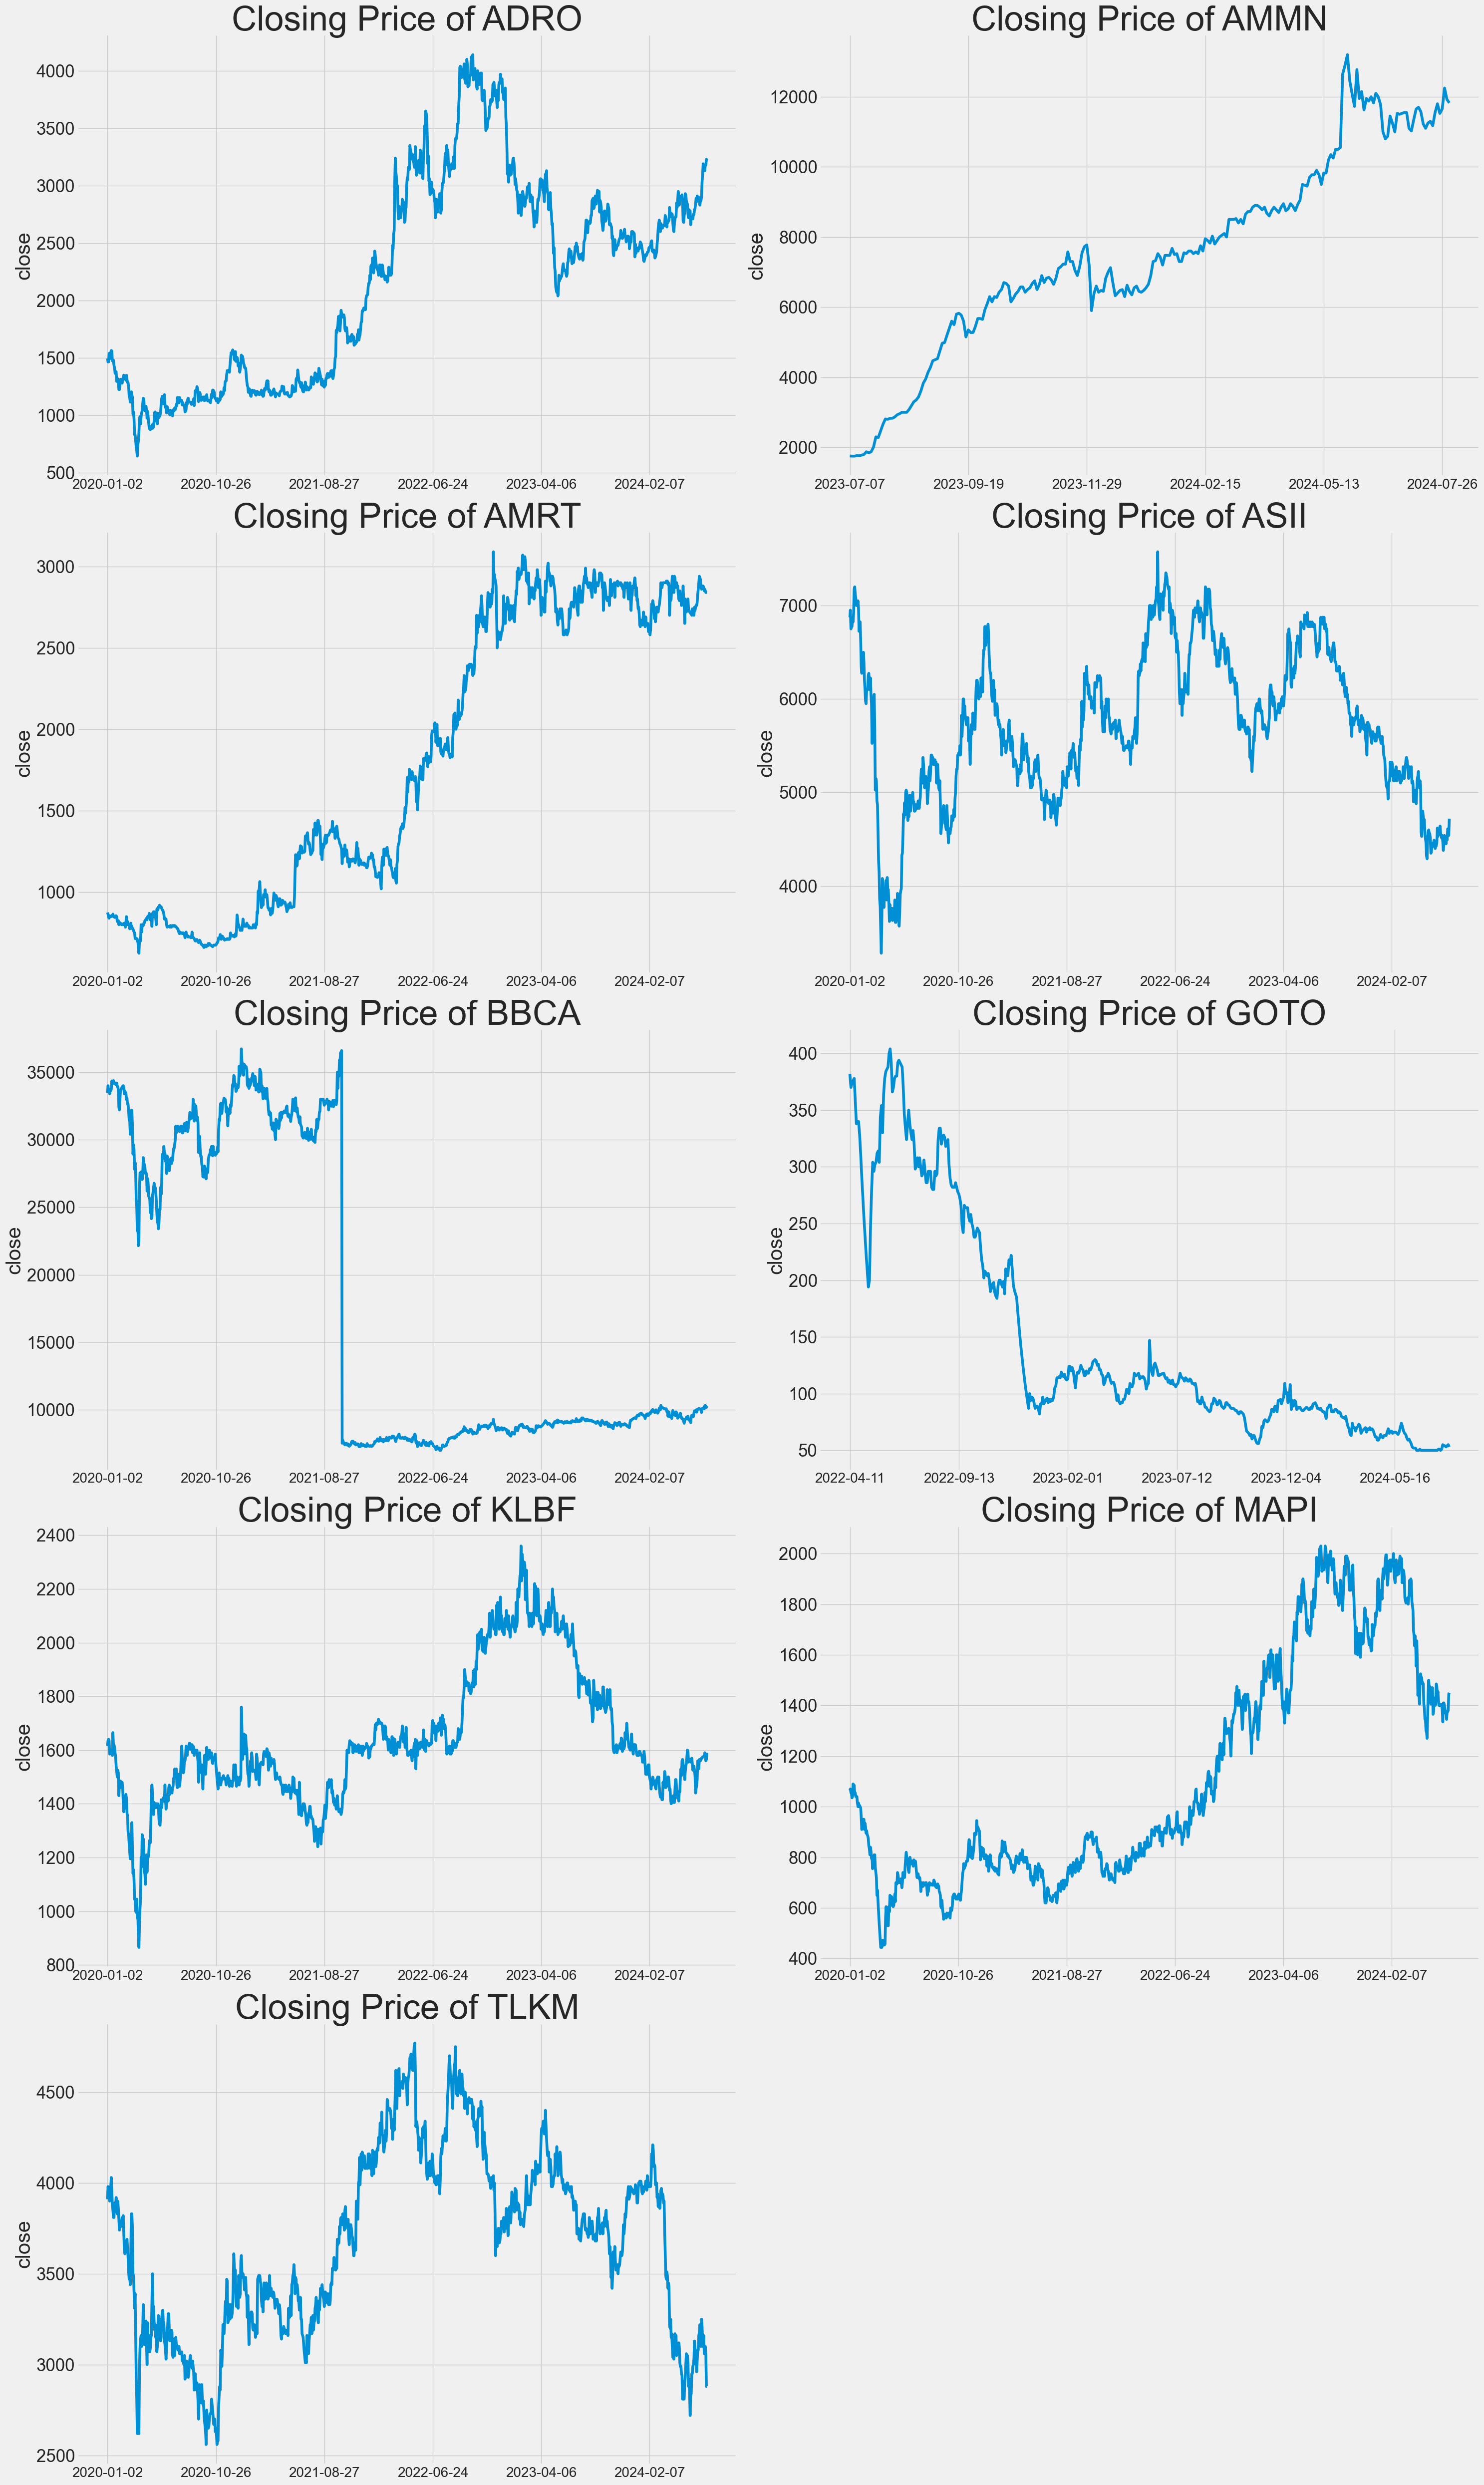

In [62]:
plt.figure(figsize=(30, 50))
plt.subplots_adjust(top=2.5, bottom=2.1)

for i, company in enumerate(company_list, 1):
    plt.subplot(5,2, i)
    company['close'].plot()
    plt.ylabel('close', fontsize=30)
    plt.yticks(fontsize=25)
    plt.xticks(fontsize=20)
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}", fontsize = 50)
    
plt.tight_layout()

### Volume Price Plotting

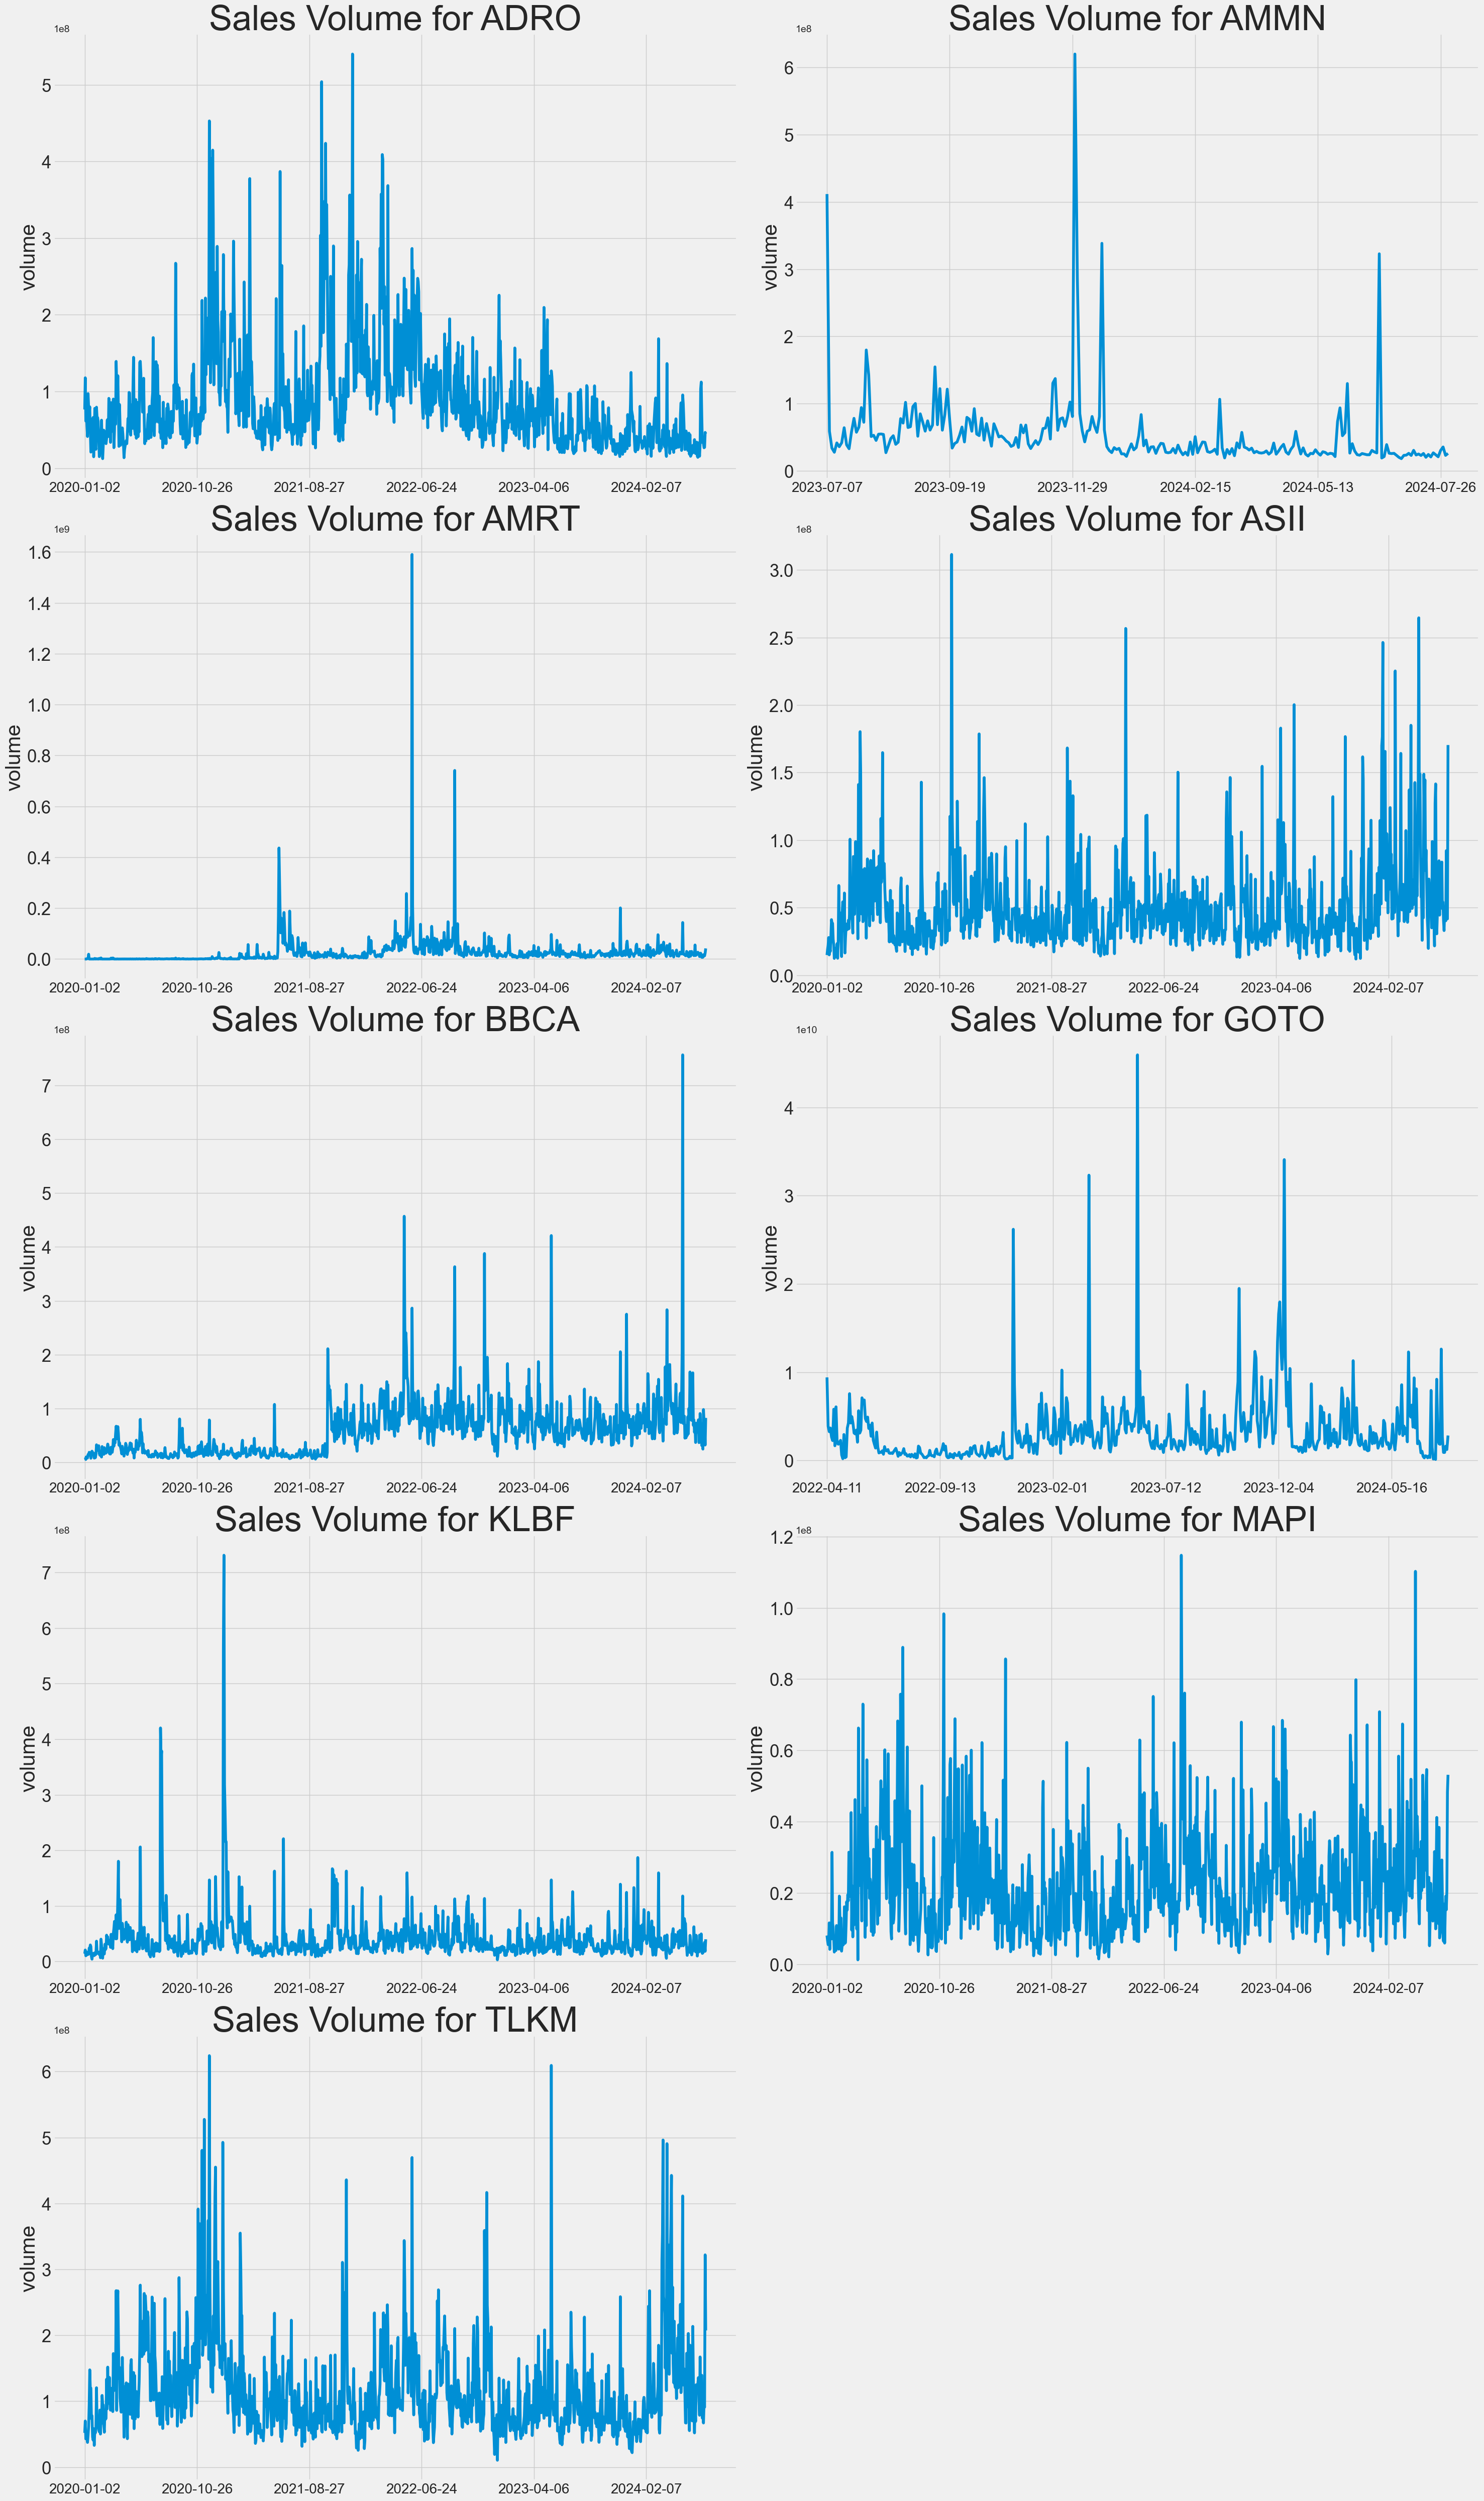

In [63]:
plt.figure(figsize=(30, 50))
plt.subplots_adjust(top=2.5, bottom=2.1)

for i, company in enumerate(company_list, 1):
    plt.subplot(5,2, i)
    company['volume'].plot()
    plt.ylabel('volume', fontsize=30)
    plt.yticks(fontsize=25)
    plt.xticks(fontsize=20)
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}", fontsize = 50)
    
plt.tight_layout()

### Moving Average

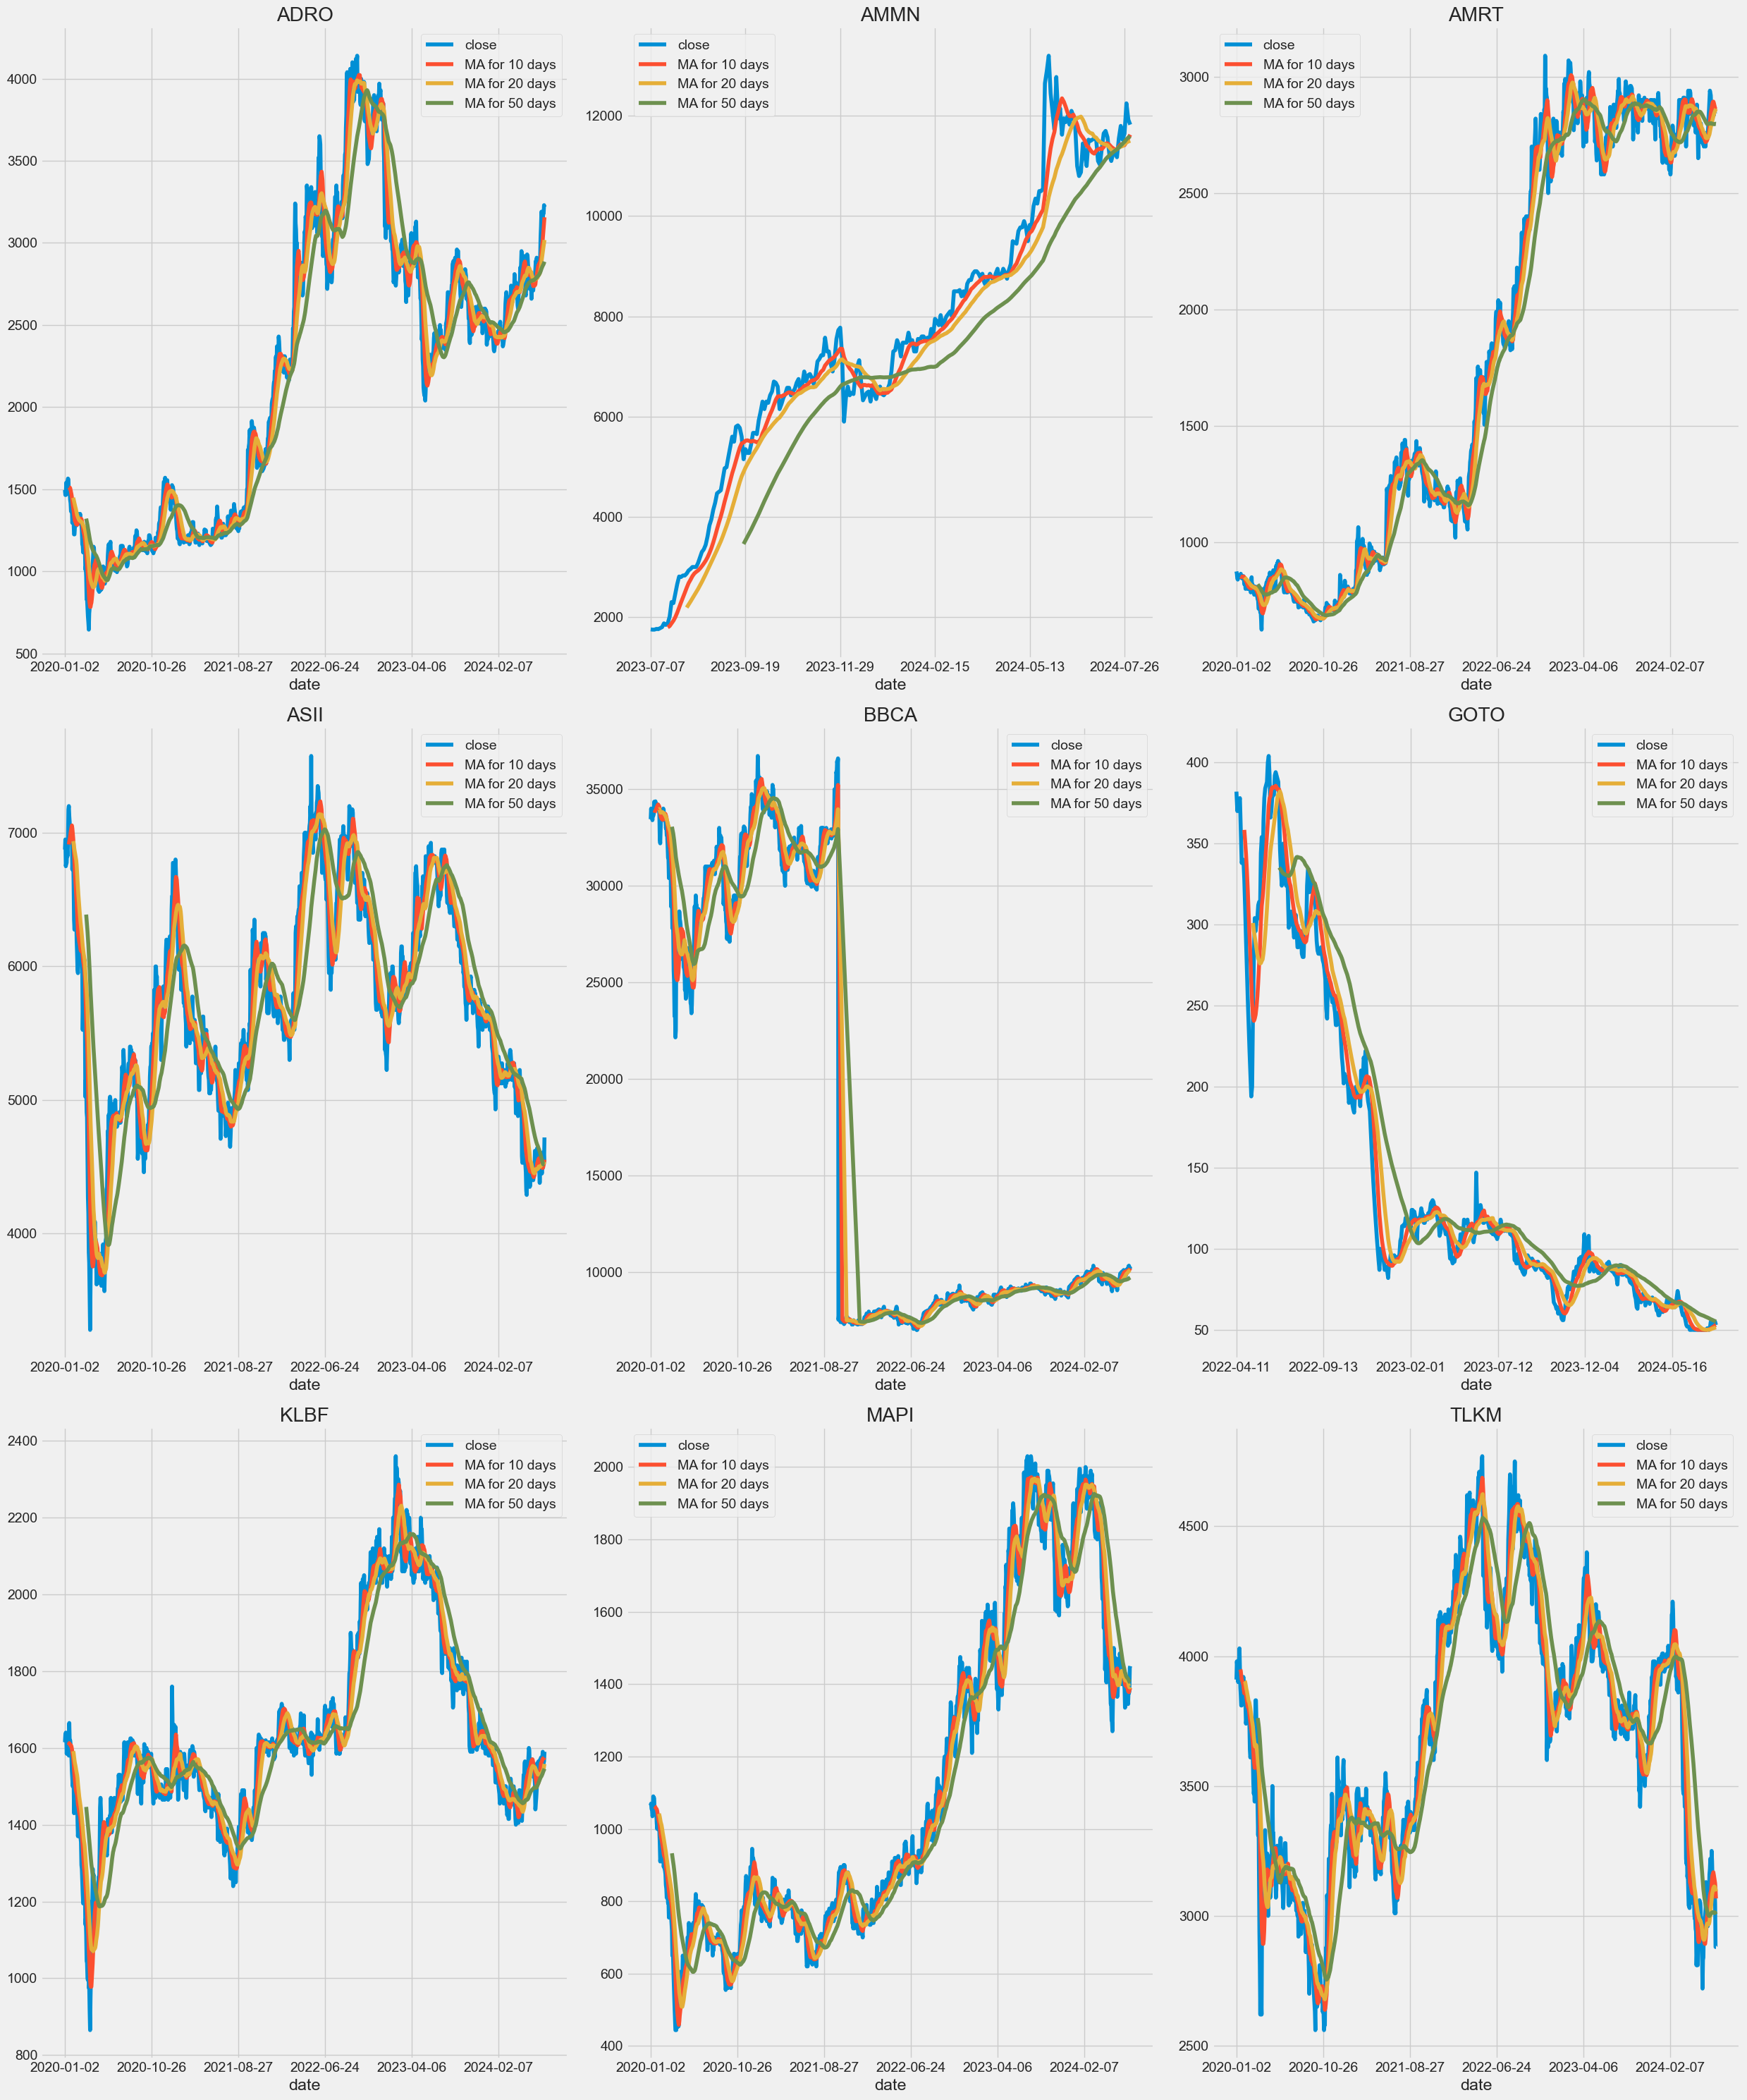

In [85]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(30)
fig.set_figwidth(25)

ADRO[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('ADRO')

AMMN[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('AMMN')

AMRT[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,2])
axes[0,2].set_title('AMRT')

ASII[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('ASII')

BBCA[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('BBCA')

GOTO[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,2])
axes[1,2].set_title('GOTO')

KLBF[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('KLBF')

MAPI[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('MAPI')

TLKM[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,2])
axes[2,2].set_title('TLKM')

fig.tight_layout()

### Daily Return 

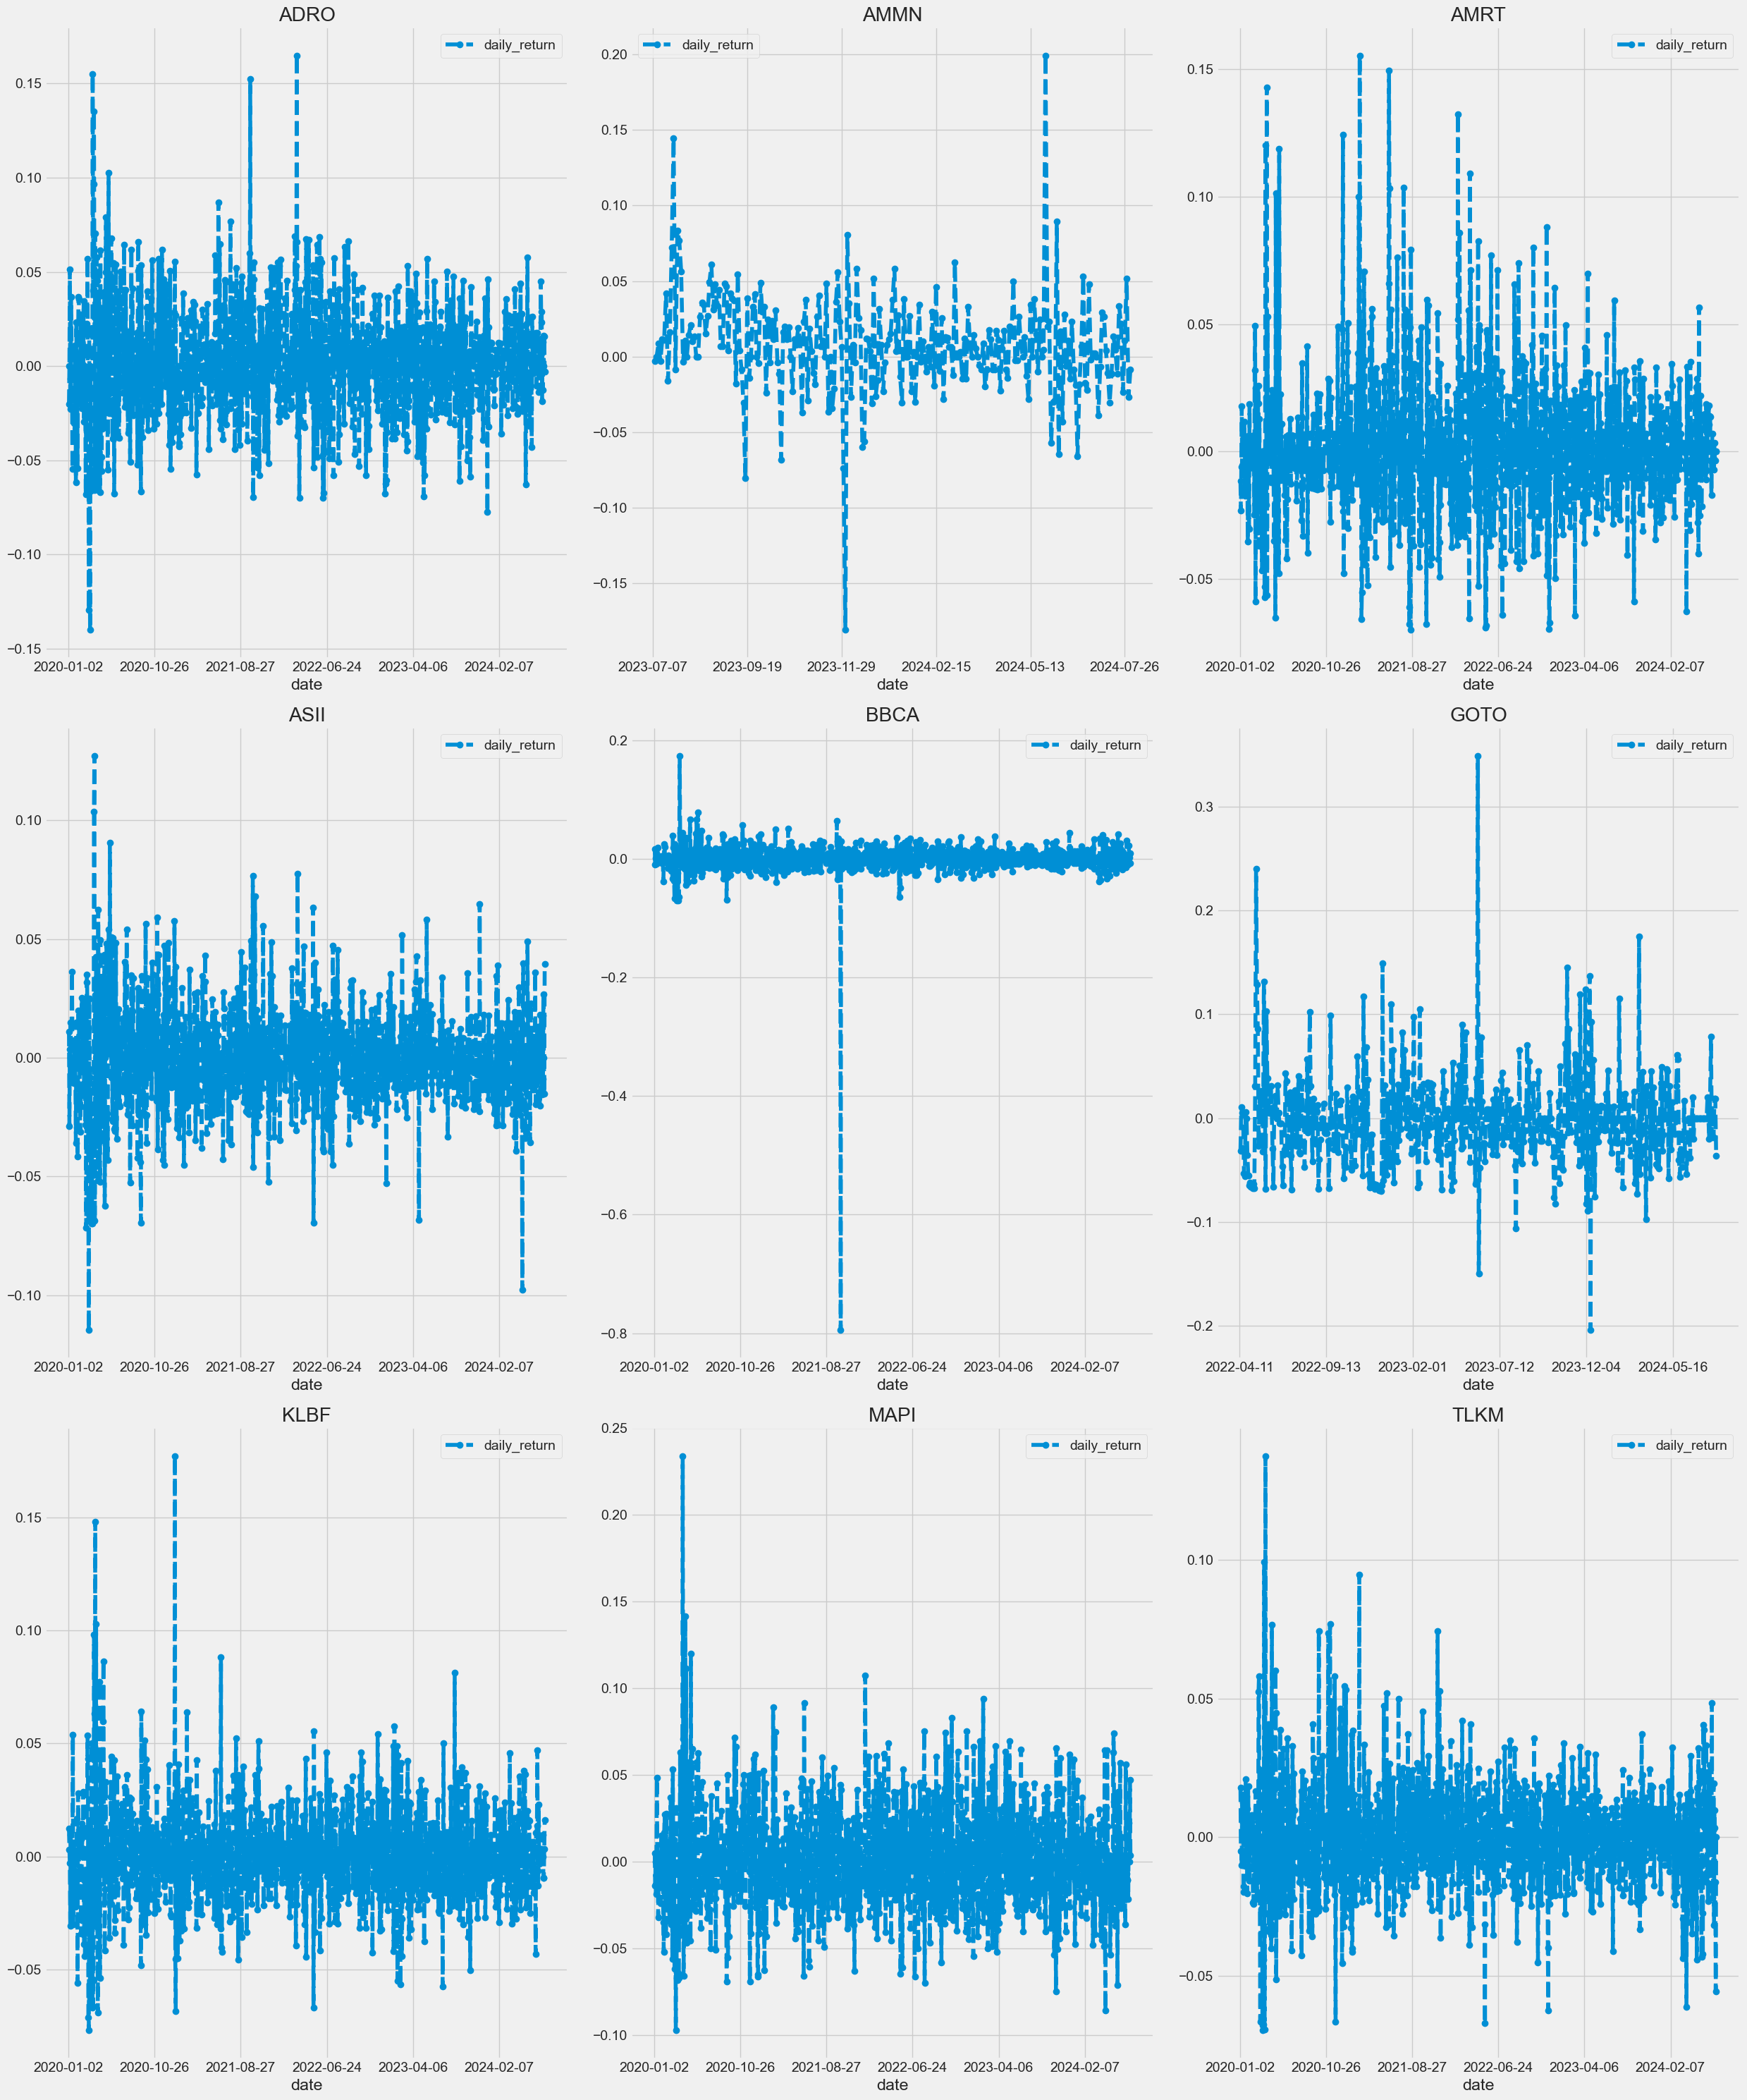

In [90]:
#Find the percent change for each day
for company in company_list:
    company['daily_return'] = company['close'].pct_change()

fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(30)
fig.set_figwidth(25)

ADRO['daily_return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('ADRO')

AMMN['daily_return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('AMMN')

AMRT['daily_return'].plot(ax=axes[0,2], legend=True, linestyle='--', marker='o')
axes[0,2].set_title('AMRT')

ASII['daily_return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('ASII')

BBCA['daily_return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('BBCA')

GOTO['daily_return'].plot(ax=axes[1,2], legend=True, linestyle='--', marker='o')
axes[1,2].set_title('GOTO')

KLBF['daily_return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('KLBF')

MAPI['daily_return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('MAPI')

TLKM['daily_return'].plot(ax=axes[2,2], legend=True, linestyle='--', marker='o')
axes[2,2].set_title('TLKM')


fig.tight_layout()


    

## Histogram

### Daily Return Histogram

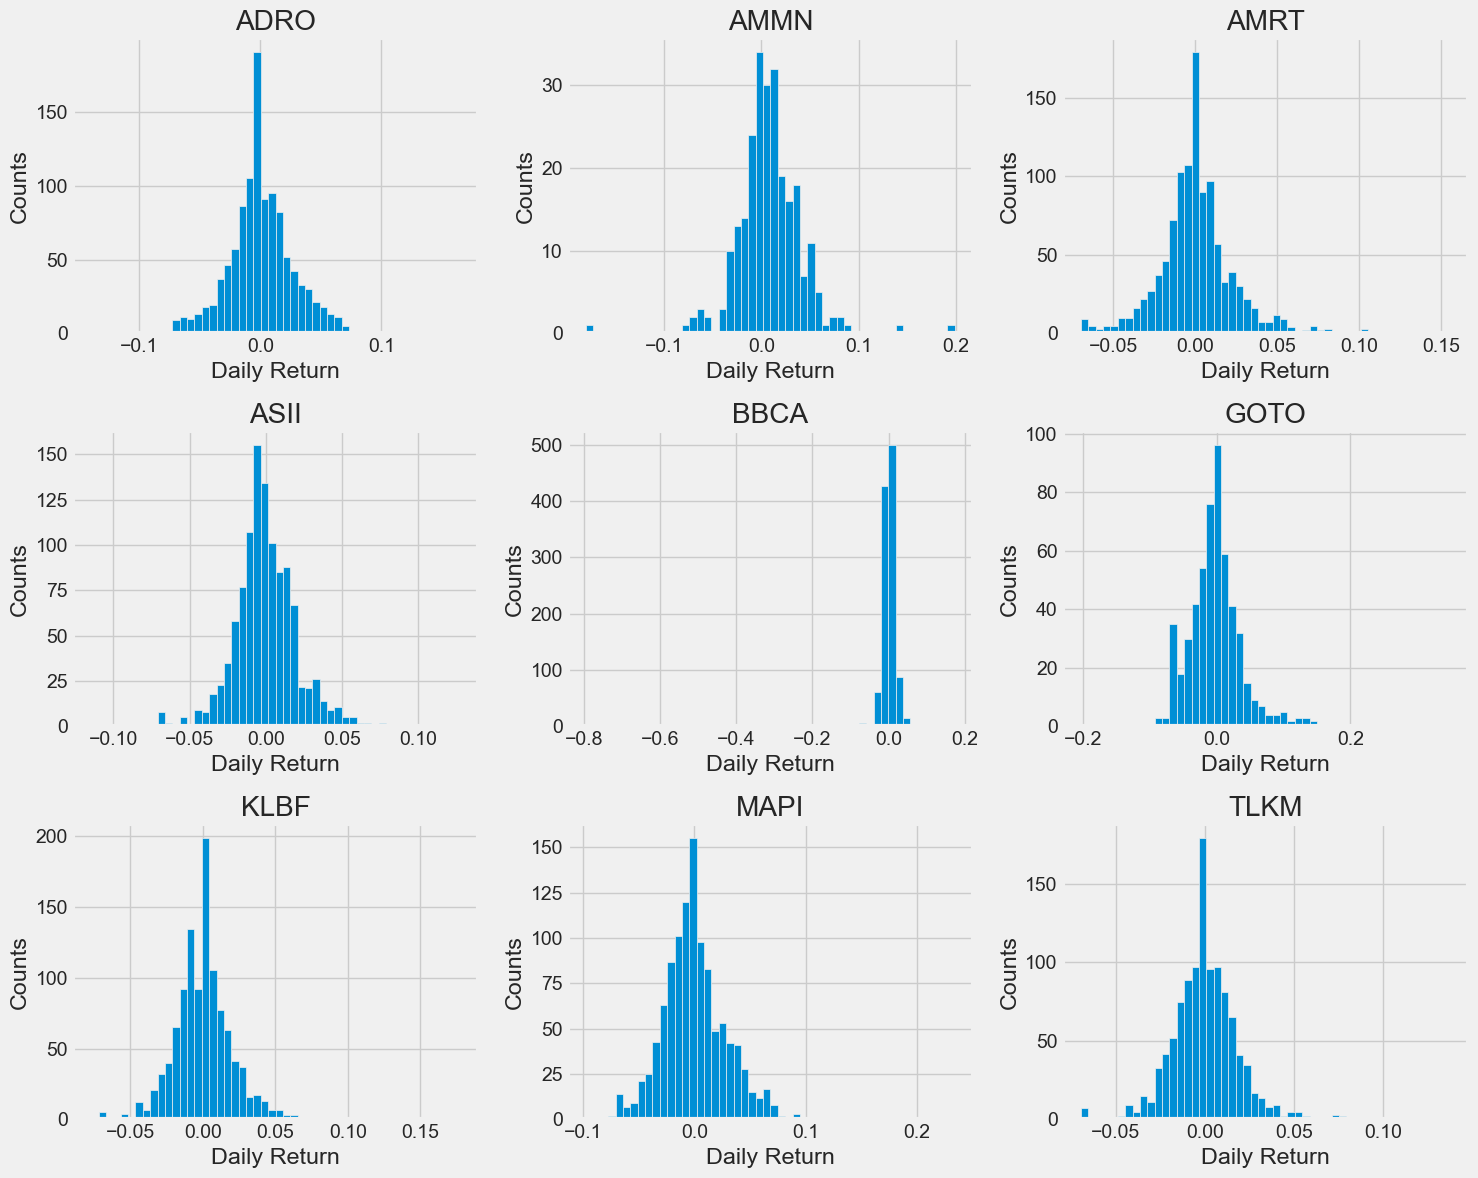

In [93]:
plt.figure(figsize=(15, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['daily_return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{tech_list[i - 1]}')
    
plt.tight_layout()

## Correlation

### Manipulate Dataframe

In [117]:

closing_df = pd.DataFrame({
                        'ADRO' : ADRO['close'],
                        'AMMN' : AMMN['close'],
                        'AMRT' : AMRT['close'],
                        'ASII' : ASII['close'],
                        'BBCA' : BBCA['close'],
                        'GOTO' : GOTO['close'],
                        'KLBF' : KLBF['close'],
                        'MAPI' : MAPI['close'],
                        'TLKM' : TLKM['close']
                        })
corr_df = closing_df.pct_change()

In [118]:
corr_df.head()

ADRO  AMMN      AMRT      ASII      BBCA  GOTO      KLBF  \
date                                                                       
2020-01-02       NaN   NaN       NaN       NaN       NaN   NaN       NaN   
2020-01-03 -0.020067   NaN -0.011429  0.010909  0.016442   NaN  0.012384   
2020-01-06  0.000000   NaN -0.023121 -0.028777 -0.009559   NaN  0.003058   
2020-01-07  0.051195   NaN -0.005917  0.003704  0.000742   NaN -0.003049   
2020-01-08 -0.022727   NaN  0.017857  0.000000 -0.008902   NaN -0.030581   

                MAPI      TLKM  
date                            
2020-01-02       NaN       NaN  
2020-01-03  0.004695  0.017903  
2020-01-06 -0.014019 -0.005025  
2020-01-07  0.000000 -0.005051  
2020-01-08 -0.018957 -0.010152

### Compare with itself

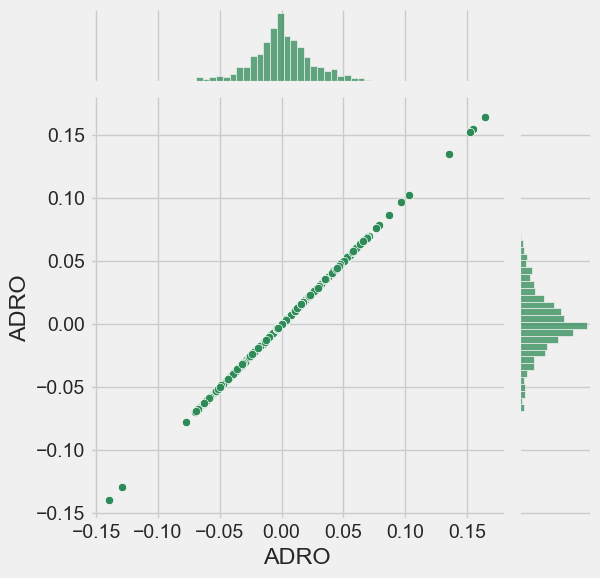

In [119]:
sns.jointplot(x='ADRO', y='ADRO', data=corr_df, kind='scatter', color='seagreen')

### Compare with another

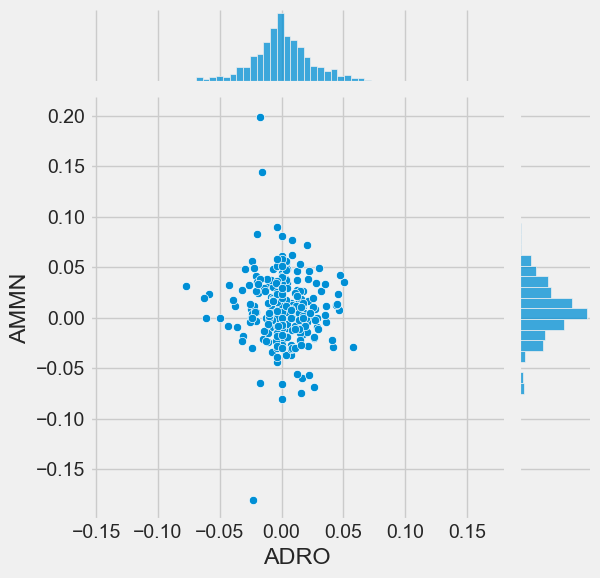

In [120]:
sns.jointplot(x='ADRO', y='AMMN', data=corr_df, kind='scatter')

### Correlation with all

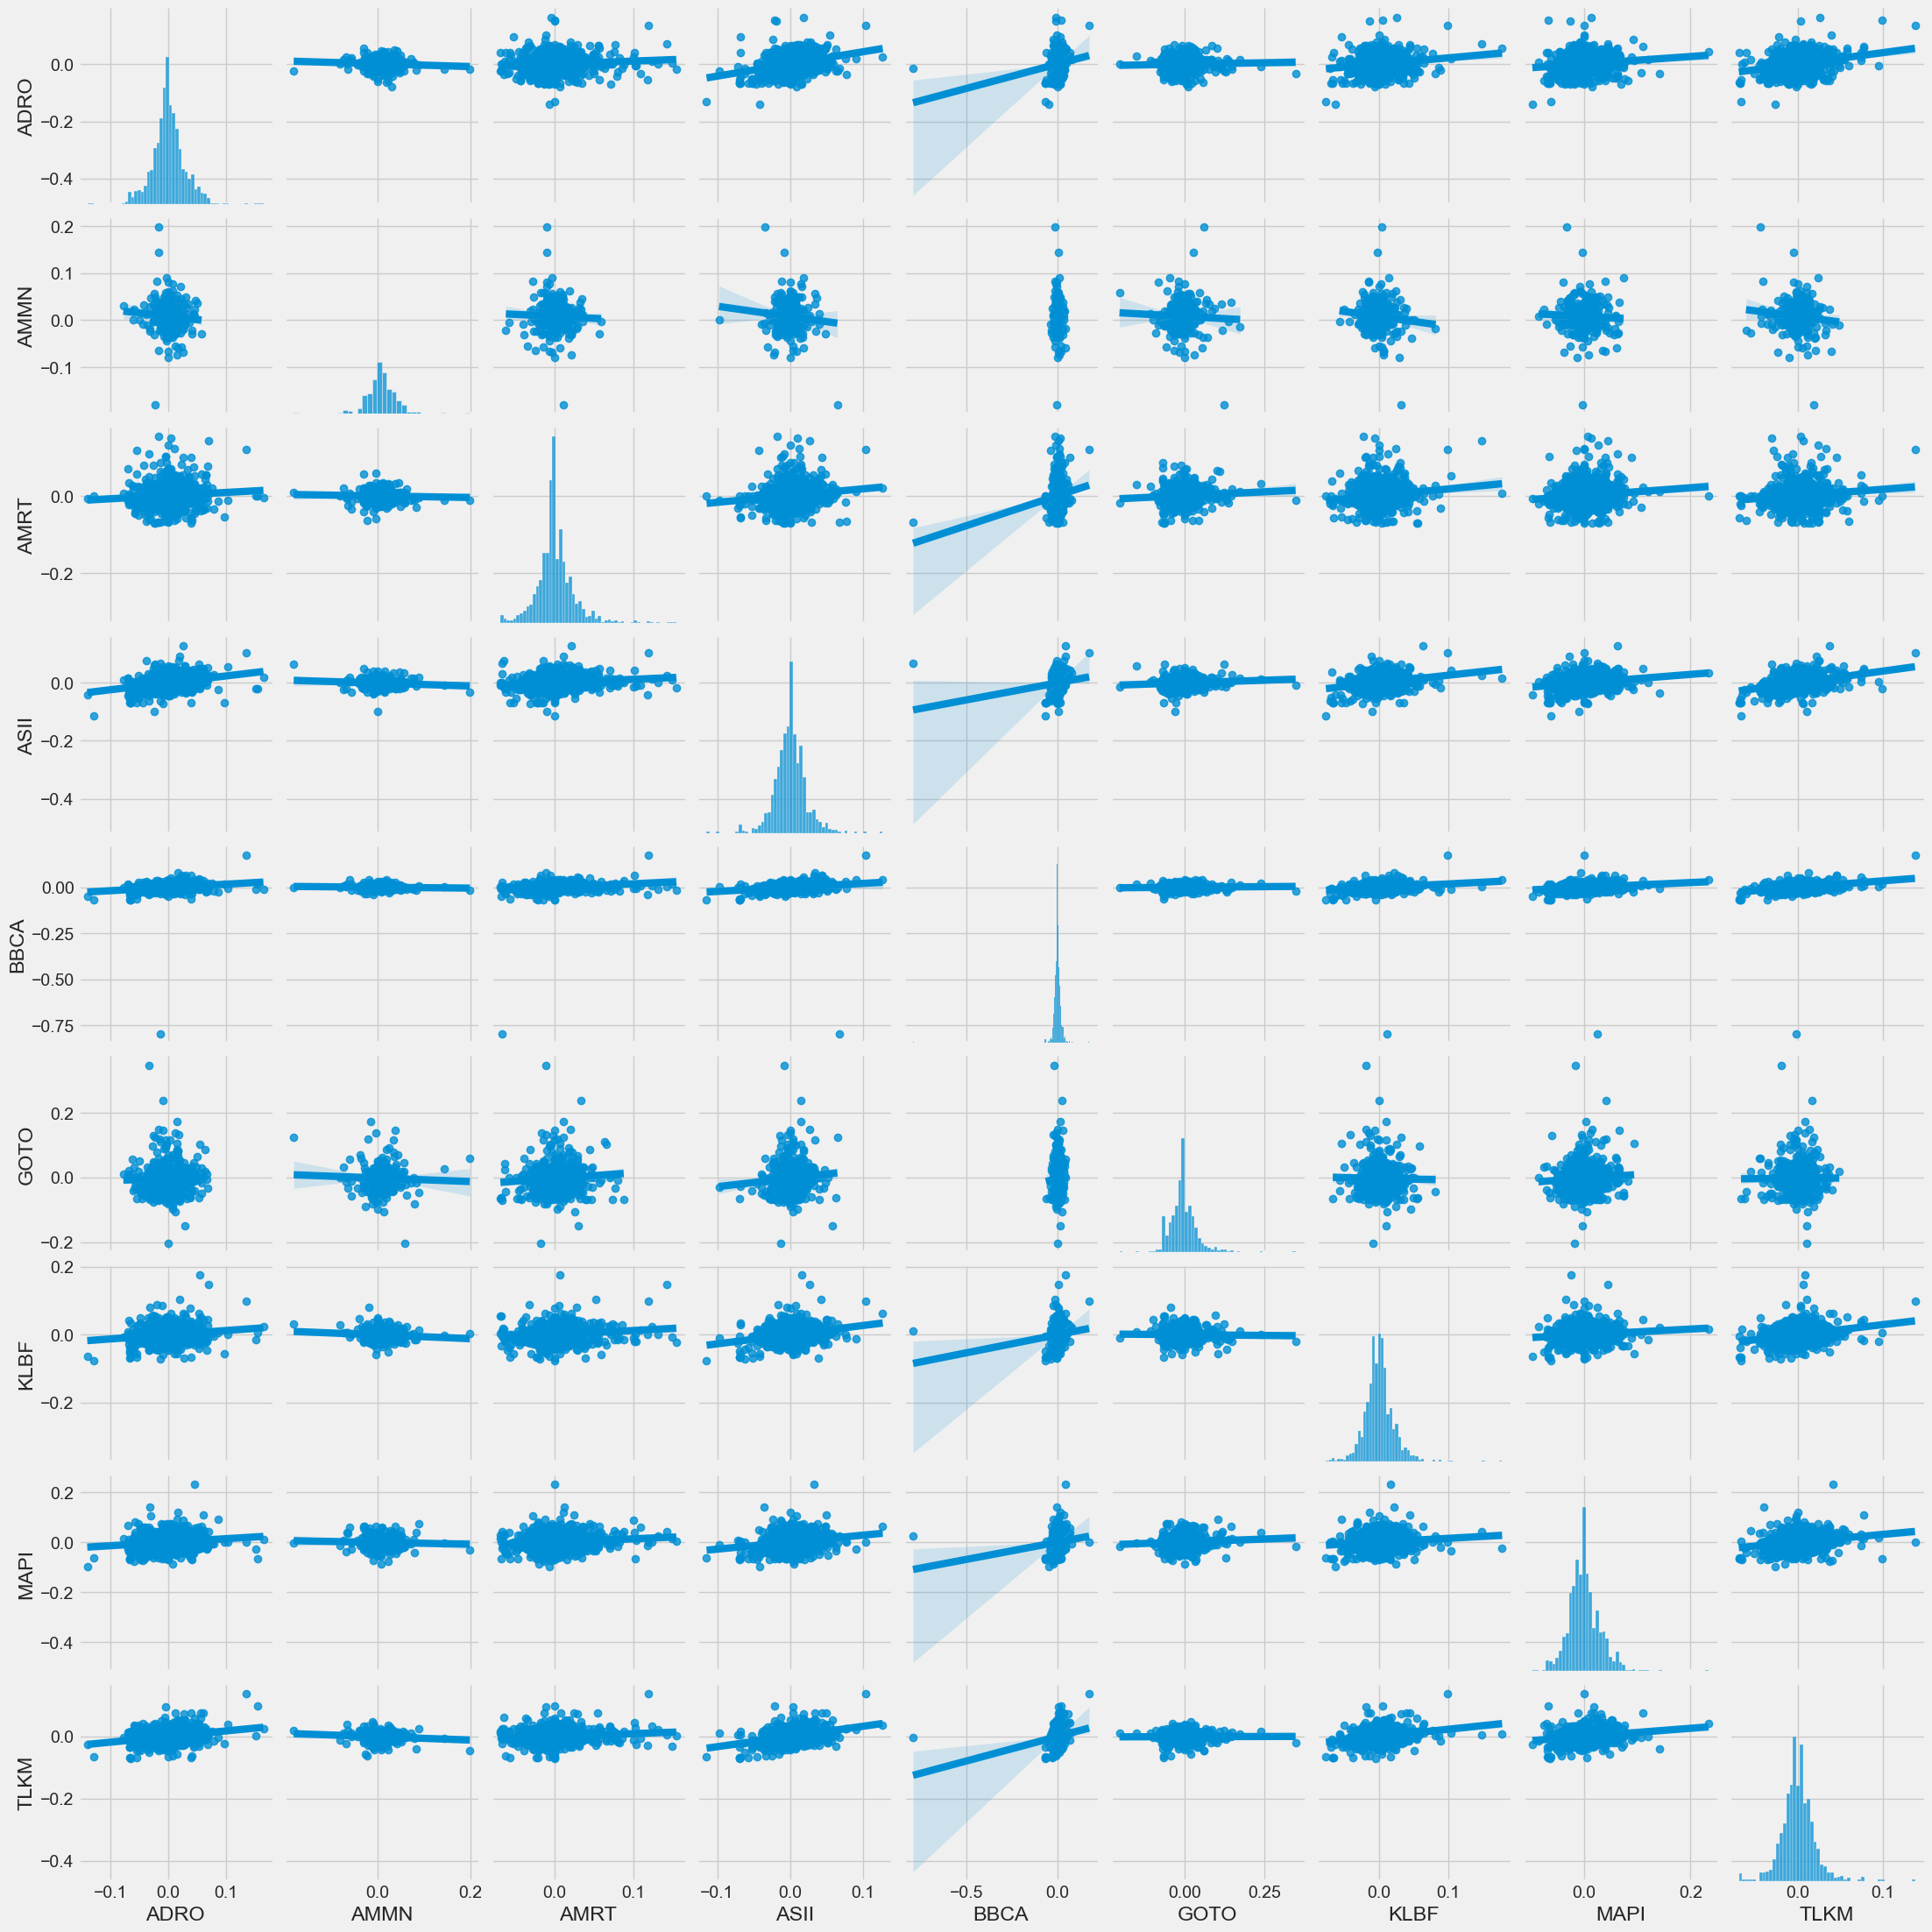

In [121]:
sns.pairplot(corr_df, kind='reg')

### Correlation with Figure

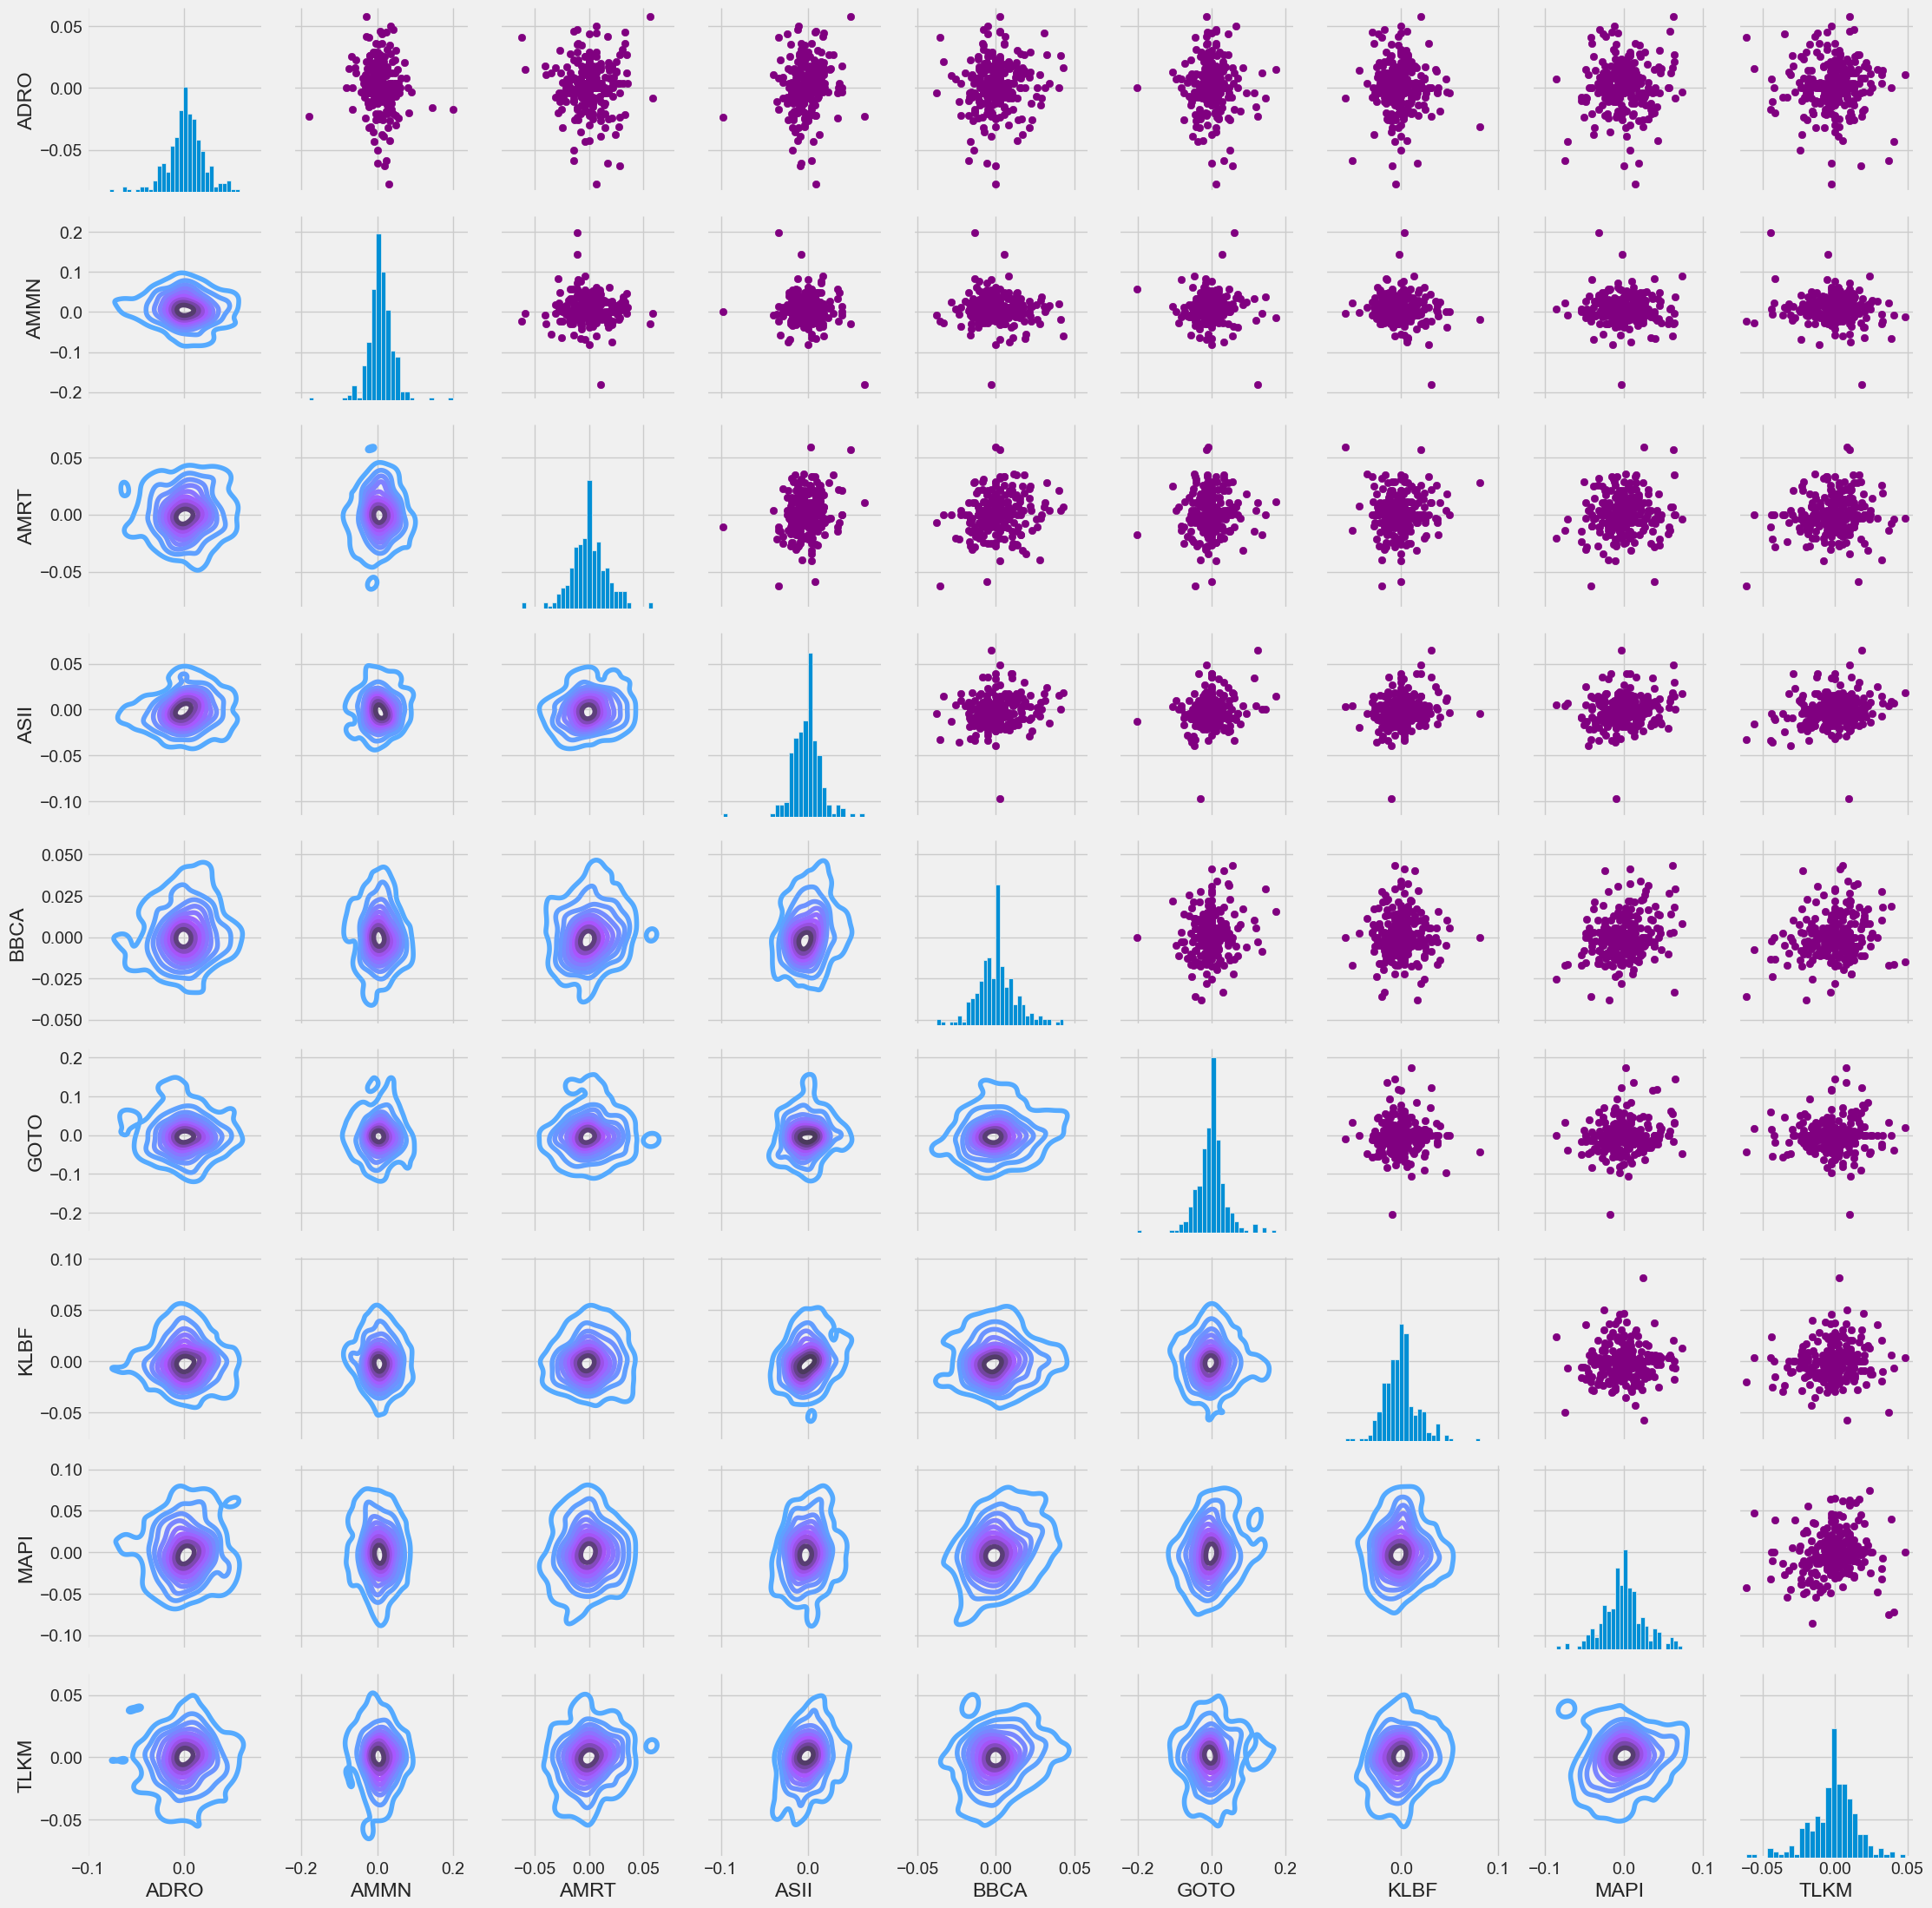

In [122]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(corr_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

### Correlation Actual Close Price with All Stock

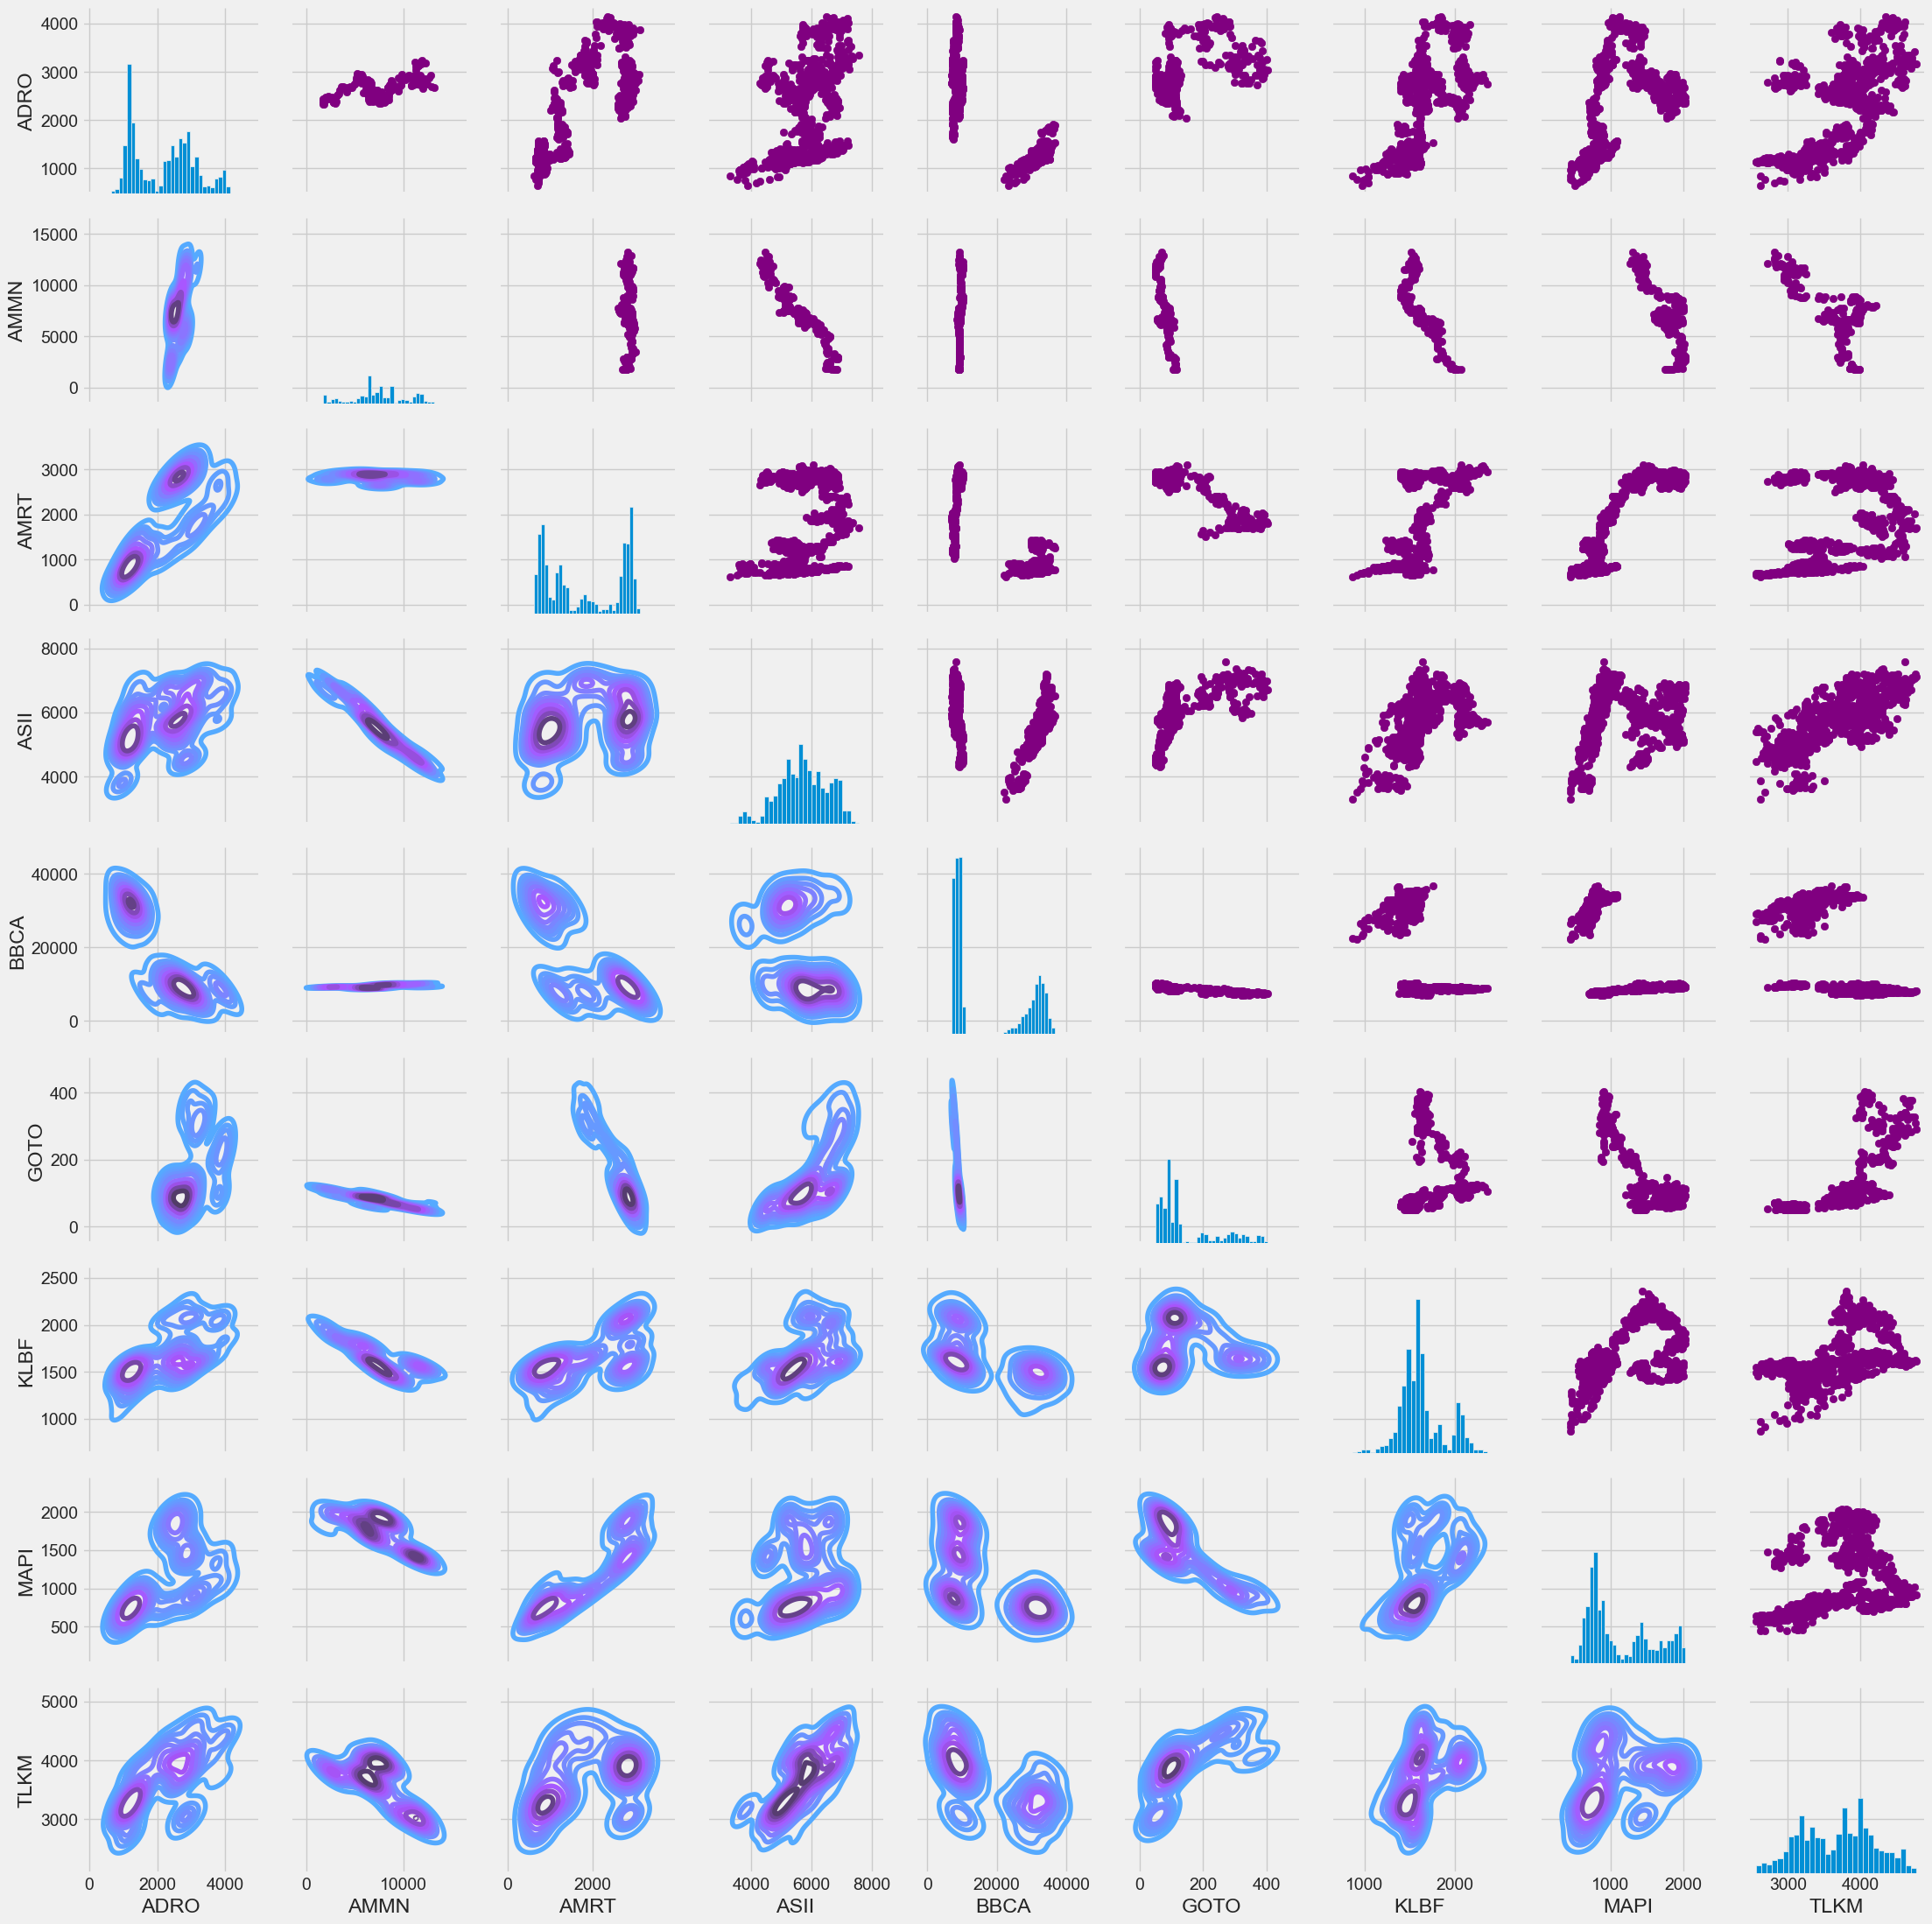

In [123]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

### Correlation with Point Terms

Text(0.5, 1.0, 'Correlation of stock closing price')

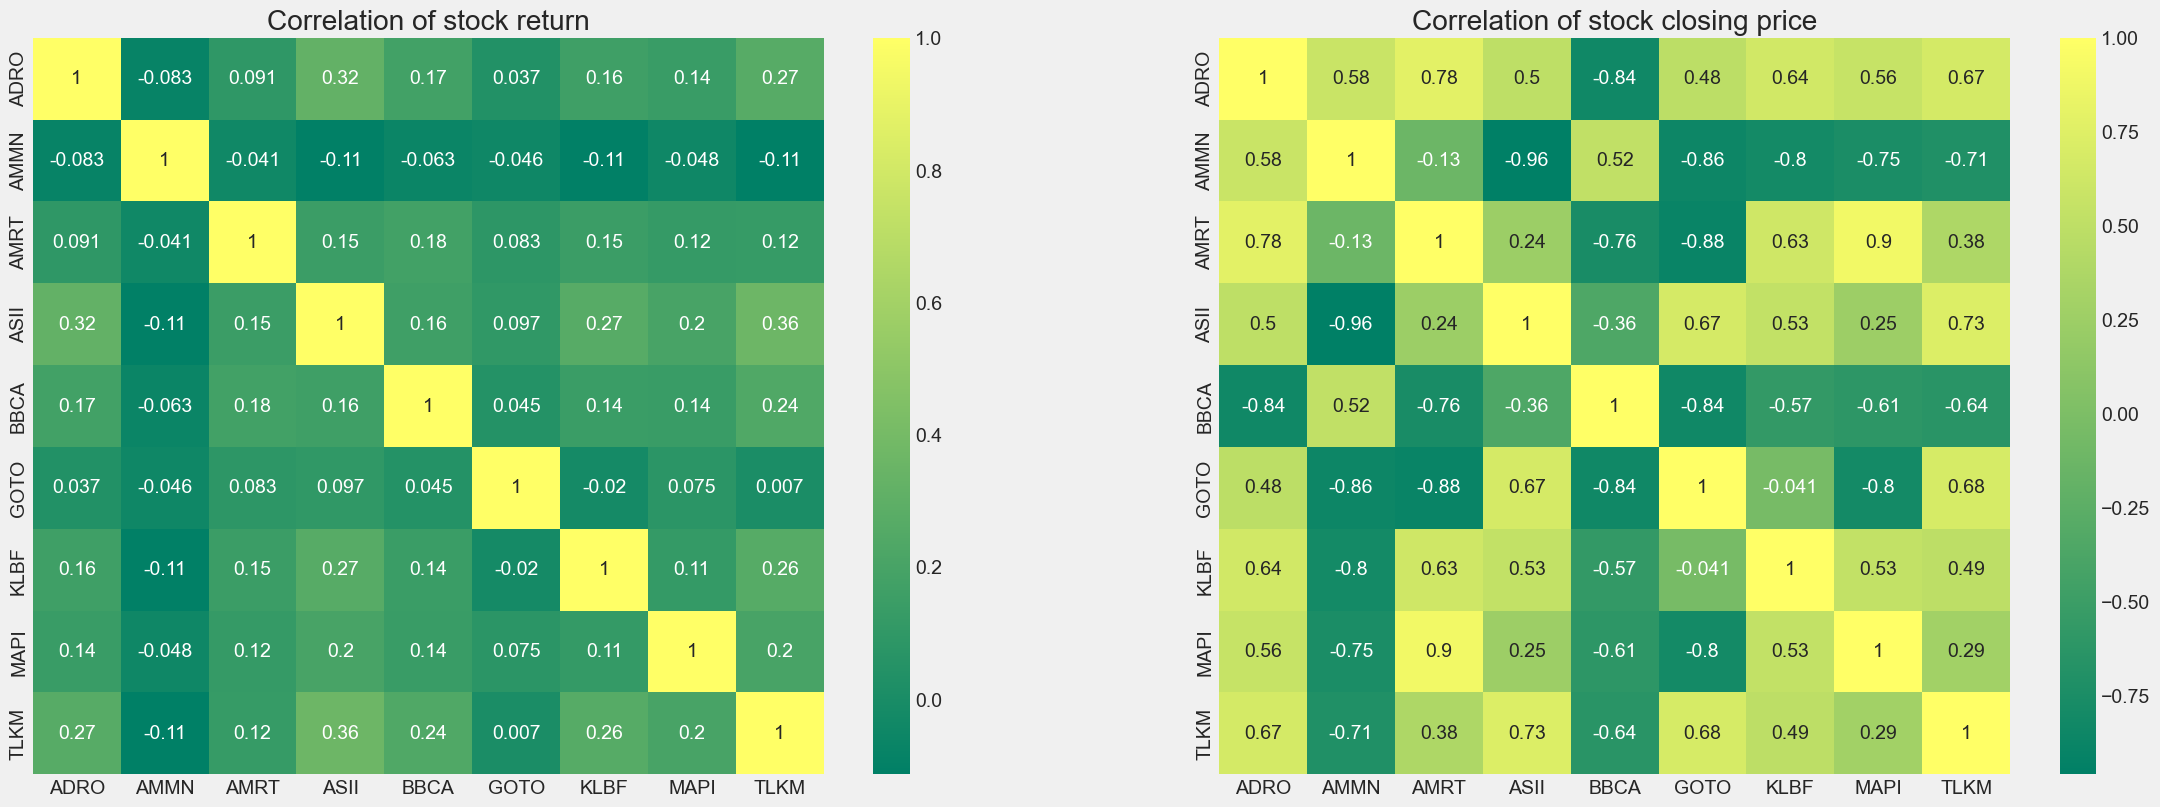

In [130]:
plt.figure(figsize=(25, 20))

plt.subplot(2, 2, 1)
sns.heatmap(corr_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

## Risk vs Expected Retirm

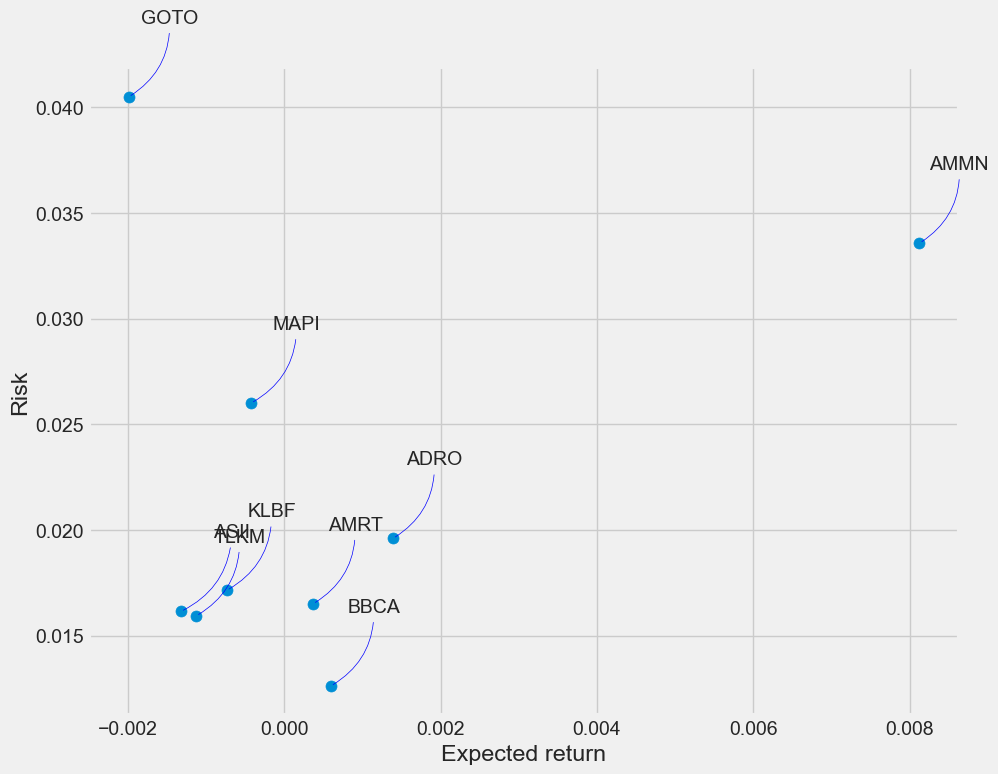

In [131]:
rets = corr_df.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))